<a href="https://colab.research.google.com/github/nagmafarez/IC-Assignments/blob/main/RNN_Assignment_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Data Preparation:

In [1]:
#Install the necessary libraries
!pip install numpy pandas tensorflow scikit-learn
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
#Loading the dataset
data = pd.read_csv('/content/twitter_training.csv')

In [3]:
data.head()

,id,name,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


*Handling missing values*

In [4]:
# Remove rows where the text column has missing values
data.dropna(subset=['text'], inplace=True)

# Check the number of missing values after cleanup
print(data.isnull().sum())

id           0
name         0
sentiment    0
text         0
dtype: int64


*Data preprocessing*

In [5]:
# Encode sentiment labels (positive, negative, neutral) into integers

label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

In [6]:
# Display the label encoding
print(label_encoder.classes_)

['Irrelevant' 'Negative' 'Neutral' 'Positive']


*Text preprocessing (Tokenization and Padding)*

In [10]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])

In [11]:
# Convert the texts into sequences
sequences = tokenizer.texts_to_sequences(data['text'])

In [12]:
# Pad sequences to ensure uniform input size
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [13]:
# Display the shape of the padded sequences
print(f"Padded sequences shape: {padded_sequences.shape}")

Padded sequences shape: (73996, 100)


We load and clean the textual dataset by removing stop words, numbers, and HTML tags. The labels are encoded as binary values.

# Split data into training and testing sets

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['sentiment'], test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (59196, 100)
Testing data shape: (14800, 100)


# Define the RNN model

In [15]:
from keras.layers import SimpleRNN

In [16]:
# Initialize RNN
model = Sequential()

#Adding an Embedding layer
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

#Adding the first RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
#Adding the second RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
model.add(SimpleRNN(units = 50)) # return_sequences is False by default
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units = 4, activation='softmax')) # 4 units for 4 classes, softmax for multi-class

#Compile the RNN
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Use sparse_categorical_crossentropy for integer labels

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

The RNN model consists of:

*  An Embedding layer to represent text as dense vectors.
*  Two SimpleRNN layers for sequential processing.
*  A Dense output layer with a sigmoid activation for binary classification.

# Model Training

In [19]:
#Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2) # Added validation split for better evaluation

Epoch 1/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 38s 39ms/step - accuracy: 0.2697 - loss: 1.4708 - val_accuracy: 0.2840 - val_loss: 1.3691
Epoch 2/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.2857 - loss: 1.3883 - val_accuracy: 0.3011 - val_loss: 1.3707
Epoch 3/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.2922 - loss: 1.3742 - val_accuracy: 0.3011 - val_loss: 1.3681
Epoch 4/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.3012 - loss: 1.3680 - val_accuracy: 0.3011 - val_loss: 1.3655
Epoch 5/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.2985 - loss: 1.3679 - val_accuracy: 0.3011 - val_loss: 1.3668
Epoch 6/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.2930 - loss: 1.3705 - val_accuracy: 0.3011 - val_loss: 1.3669
Epoch 7/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.2985 - loss: 1.3682 - val_accuracy: 0.3011 - val_loss: 1.3682
Epoch 8/100
740/740 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.3004 - loss: 1

The model is trained using binary cross-entropy as the loss function and Adam optimizer for 100 epochs

# Model Evaluation

In [20]:
# Evaluate the trained RNN model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

463/463 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2960 - loss: 1.3741
Loss: 1.3735390901565552
Accuracy: 0.29554054141044617


*The model’s accuracy and loss are evaluated on the test data.*

In [21]:
#Predict Sentiment for new texts
new_texts = ["I love this product!", "This is the worst experience."]
new_texts_seq = tokenizer.texts_to_sequences(new_texts)
new_texts_pad = pad_sequences(new_texts_seq, maxlen=100)

In [22]:
predictions = model.predict(new_texts_pad)
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
['Negative' 'Negative']


*You can predict the sentiment of new sentences by tokenizing them and passing them through the model.*

Text(0.5, 1.0, 'Distribution of Sentiment')

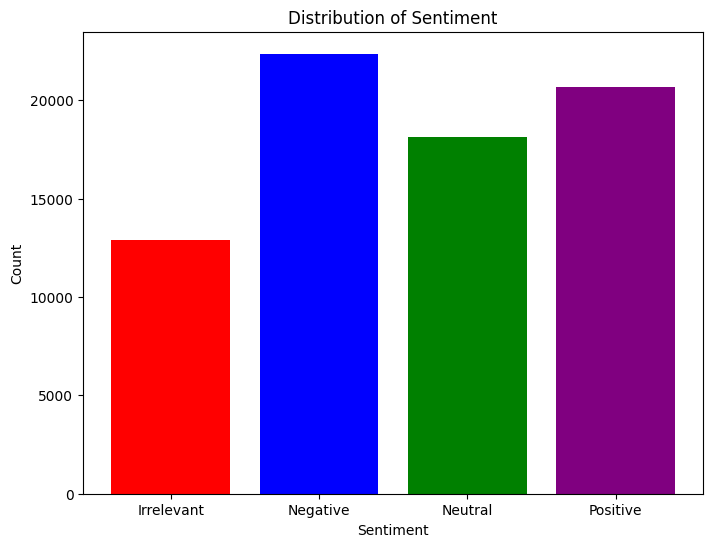

In [29]:
import matplotlib.pyplot as plt

# Get the counts of each sentiment
sentiment_counts = data['sentiment'].value_counts().sort_index()

#Get the corresponding labels from the label encoder
sentiment_labels = label_encoder.classes_

#Plot the sentiment distrubution
plt.figure(figsize=(8,6))
plt.bar(sentiment_labels, sentiment_counts.values, color=['red', 'blue', 'green', 'purple'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')

This plot shows the distribution of sentiment classes in the dataset. The X-axis represents different sentiment categories (e.g., positive, negative, neutral), and the Y-axis shows the frequency of each sentiment. The color-coded bars indicate the count of occurrences for each sentiment. This visualization helps identify if the dataset is balanced or if certain sentiments dominate.